In [1]:
import creds
import riotwatcher as rtw
import pandas as pd
import numpy as np
import mylibraries as my
import matplotlib.pyplot as plt

Make connection to API

In [2]:
connection = rtw.LolWatcher(creds.riot_API_Key)


Obtener jugador

In [3]:
Nombre_jugador = input("Ingresa tu nombre de usuario: ")
print("Elige tu region")
regiones = {1:"BR1",2:"EUNE1",3:"EUW1",4:"JP1",5:"KR",6:"LA1",7:"LA2",8:"NA1",9:"OC1",10:"TR1",11:"RU",12:"PH2",13:"SG2",14:"TH2",15:"TW2",16:"VN2"}

for region in regiones:
    print(region," ",regiones[region])

while(True):
    region = int(input())
    if region < 1 or region > 16:
        print("Region no reconocida, intenta de nuevo")
    else:
        break

region = regiones[region]
try:
    jugador = connection.summoner.by_name(region = region, summoner_name=Nombre_jugador)
    print("Jugador encontrado!")
except:
    print("Jugador no encontrado")

Elige tu region
1   BR1
2   EUNE1
3   EUW1
4   JP1
5   KR
6   LA1
7   LA2
8   NA1
9   OC1
10   TR1
11   RU
12   PH2
13   SG2
14   TH2
15   TW2
16   VN2
Jugador encontrado!


# Mejores campeones

In [4]:
Maestrias = connection.champion_mastery.by_summoner(region=region,encrypted_summoner_id=jugador["id"])
campeones = my.GetChampsNamesAndMasteries(Maestrias)

Maestria = pd.DataFrame(campeones, columns=["Campeon","Puntos de maestria","Tipo"])
Maestria.to_csv("Jugadores/"+Nombre_jugador+".csv",index=False)
Maestria


,Campeon,Puntos de maestria,Tipo
0,MonkeyKing,45657,"[Fighter, Tank]"
1,JarvanIV,41075,"[Tank, Fighter]"
2,Poppy,34325,"[Tank, Fighter]"
3,Sejuani,30602,"[Tank, Fighter]"
4,Vi,27485,"[Fighter, Assassin]"
...,...,...,...
67,Ezreal,159,"[Marksman, Mage]"
68,MissFortune,143,[Marksman]
69,Tryndamere,135,"[Fighter, Assassin]"
70,Sona,133,"[Support, Mage]"


#### Grafica de maestrias

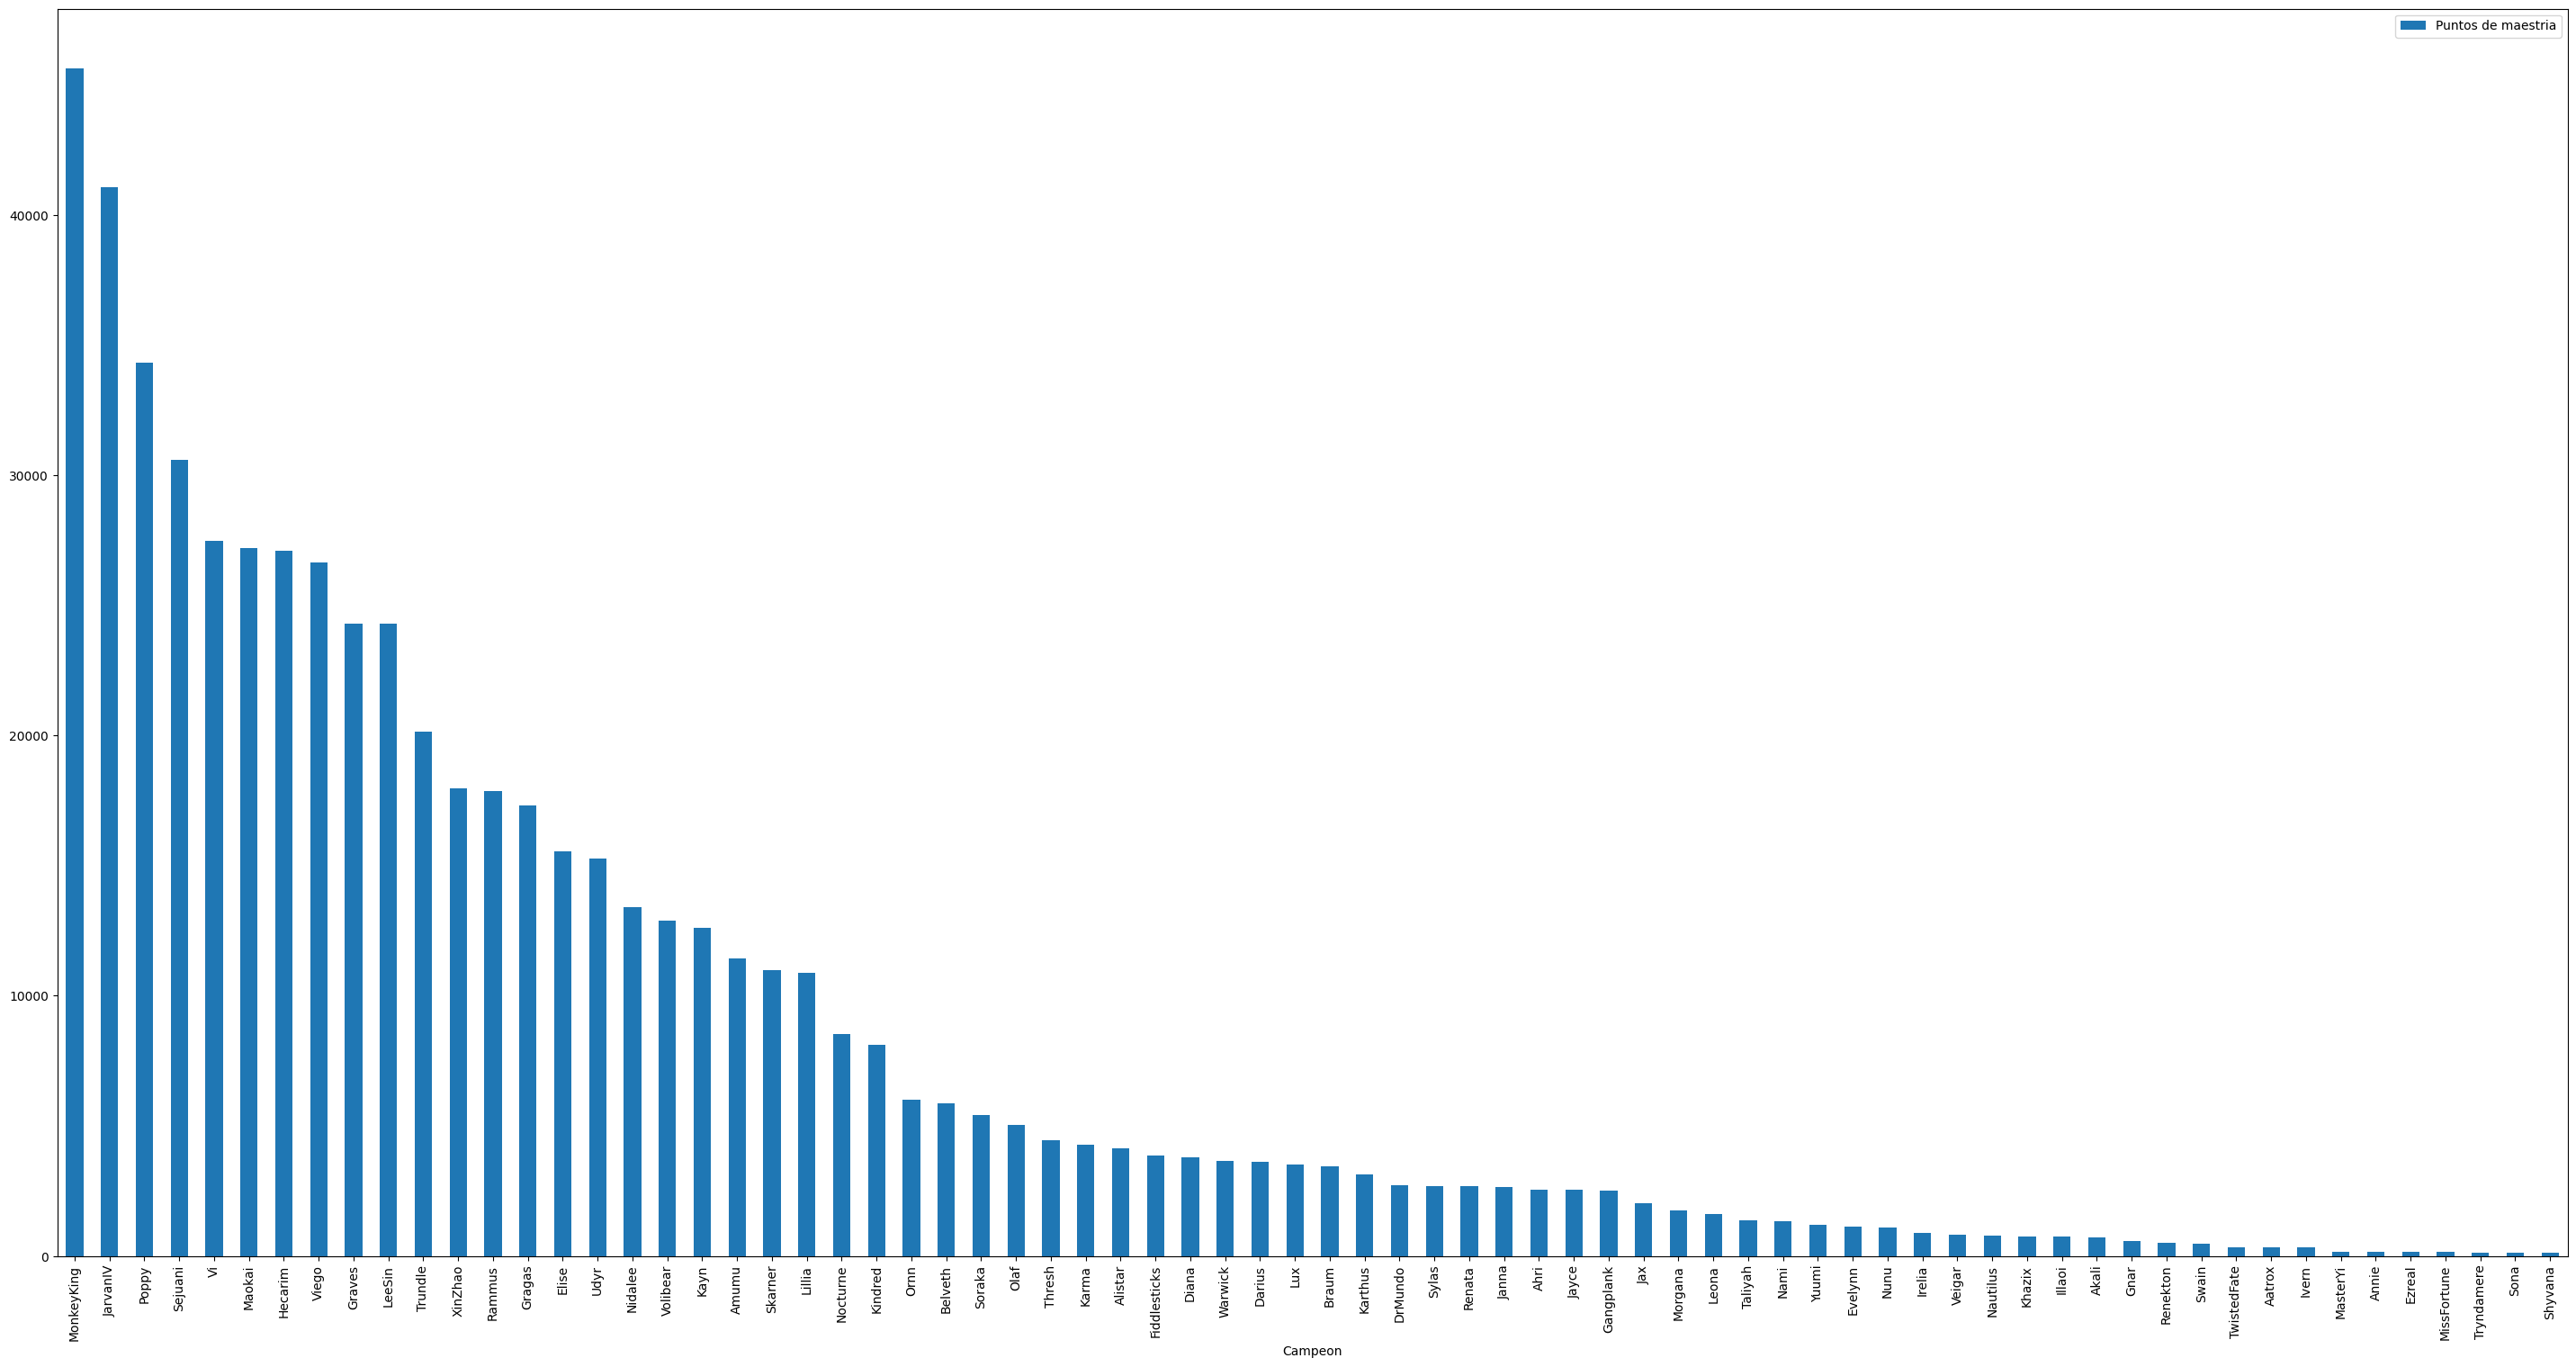

In [5]:
size = len(Maestria)/2
Maestria.plot.bar(x = "Campeon", y = "Puntos de maestria", figsize = (size,size/2))
plt.show()

# Partidas

In [8]:
partidas = connection.match
partidas = partidas.matchlist_by_puuid(region = region, puuid=jugador["puuid"])
print(partidas[-1])
partida = my.GetMatchInfo(region,partidas[-1])
partida

LA1_1373182767
la1


{'metadata': {'dataVersion': '2',
  'matchId': 'LA1_1373182767',
  'participants': ['JzHv7uvLPEBrekRbt85ovRAJcmeX_k5-obsl74krV96OYGPzITC9dCoyQQpea6TAhFuFgeigXn2PPg',
   '_ROPUnorv3aVovk2pvxxKOpkipZxHUZJH-yOToXlJLZ7397Ubg0R_NJS3H4rG_RjgpidV1dVBkveOA',
   'sjF42MBHtVuR_T8NAjDFK4qMB8u5s1Ay1pEO6SauWsMR89qiJr7RqmJzHxwWSll3bMnhUQsofKCqRA',
   'nwhtAx7XuGAAWNSoCjcdKfgJHzVpp-XhcFC9OXdQQxTSop6jSxD4PSYCo6Ror-8DYwLGX19F-S5KzA',
   'RMwqLA__IfYHtn07YkXaS1fNQVEFOGYTaTPHcbInmWXfTepaELvEYFzQDxK0e6c8jjXkfc2vHTBCOg',
   'MJo9x6acXEmLkUEKENQRNfgeTlxwf3zoLDkRuhl0Iut_IdU127-FPvfon8-nMrjvjkKr369zt_mANg',
   'AaMPT8qbDtn8hyMTkQlpTwYv0rpwS9vDatTt3YP3Ff4hpV6g7dqFWKlvBIdv0k6_BXtbO1uvVgbTCQ',
   'JbSrwYeYGznWmb63oE-S4MiYanrGcfqTrQtOE4KrzdhKYPm9IlMmI3hHuis9YU6rbhCG0feanZKDWQ',
   'G2dWCXOxgscaL4dpL1dqKTauYl6-cFVqsoRXAktrRvdp8udlzR0VywTDeskHmq_dT1DRxOLjdLyGYg',
   'yGwAqsNI-qfC3-pa1iMA-nmpSY3HWlrst9FYJ69YjfWXFf3fPvKEaXhkmUAzse24nGoRnEKkmRuJ8g']},
 'info': {'gameCreation': 1680402285700,
  'gameDuration': 1269,
  

In [9]:
jugador["puuid"]

'_ROPUnorv3aVovk2pvxxKOpkipZxHUZJH-yOToXlJLZ7397Ubg0R_NJS3H4rG_RjgpidV1dVBkveOA'